In [1]:
# 第一步：加载imdb数据集（由于这个数据集是keras自带的，所以可以直接导入）
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

len(train_data[0])

Using TensorFlow backend.


218

In [5]:
# 解码电影评论

def get_decode_dict():
# 获得解码字典（首次调用该函数需联网下载字典）
    word_index = imdb.get_word_index() # dict{word -> number}
    reverse_word_index = {}
    for key,value in word_index.items():
        reverse_word_index[value] = key
    return reverse_word_index

def decode_reviews(review):
# 解码一条评论。如需解码多条评论，需循环调用此函数
    decode_review = ""
    for num in review:
        decode_review = decode_review + " " + reverse_word_index.get(num-3,"?")
    return decode_review

In [7]:
# 第二步：准备数据：将train_data进行one-hot编码。但对于影评这种序列数据来说这样会损失数据的序列信息.
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        result[i,sequence] = 1
    return result

# 数据向量化，标签向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_test[0])
print(test_labels[0])

0.0
0


In [8]:
# 第三步：构建网络模型

# input_data 是向量，labels 是0或1，这种情况下用全连接层即可

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
# 第四步：用数据训练模型，并验证模型的预测效果

# 1. 划分出validation_set（用前10000条数据作为验证）
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. 用数据拟合模型
history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 148us/step - loss: 0.5163 - accuracy: 0.7874 - val_loss: 0.3874 - val_accuracy: 0.8714
Epoch 2/4
15000/15000 [==============================] - 2s 126us/step - loss: 0.3077 - accuracy: 0.9055 - val_loss: 0.3104 - val_accuracy: 0.8827
Epoch 3/4
15000/15000 [==============================] - 2s 119us/step - loss: 0.2272 - accuracy: 0.9249 - val_loss: 0.2788 - val_accuracy: 0.8899
Epoch 4/4
15000/15000 [==============================] - 2s 110us/step - loss: 0.1790 - accuracy: 0.9413 - val_loss: 0.2816 - val_accuracy: 0.8875


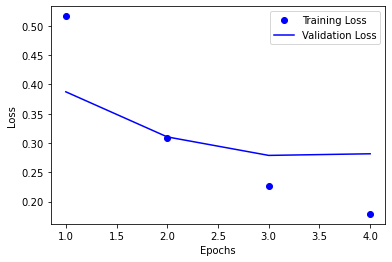

In [10]:
# 第五步：训练数据可视化

import matplotlib.pyplot as plt

history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

epochs = range(1,len(loss_value)+1)

plt.plot(epochs,loss_value,'bo',label='Training Loss')
plt.plot(epochs,val_loss_value,'b-',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# 使用模型预测结果
model.predict(x_test)


array([[0.35503045],
       [0.9993931 ],
       [0.9494015 ],
       ...,
       [0.13736719],
       [0.16921371],
       [0.71426874]], dtype=float32)